## overall plan

* Review and roadmap: what happens when I click this button?

* Last class: logistic regression

* This class: 

* Embeddings (Bengio, 2003)

* Recurrent neural networks (skip-gram versus recurrent)

* Transformers & attention (2017; capturing dependence without vanishing gradient)

* ChatGPT: looks like if we end up using alpa.ai’s OPT (from Meta), then we might need to understand concepts such as “Temperature”, “response length”, and “Top-p”


# hard to debug environment!
https://www.google.com/search?q=how+to+add+an+environment.yml+file+to+an+existing+conda+environment

# steps to reproduce this notebook

1. Click on open in a codespace at https://github.com/onefact/datathinking.org-codespace - 
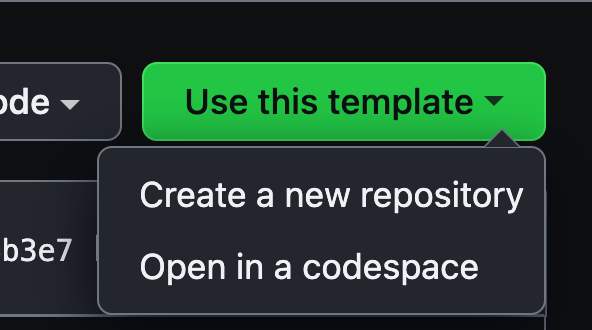
2. Create a new anaconda environment
3. Open a new terminal session with `zsh`:

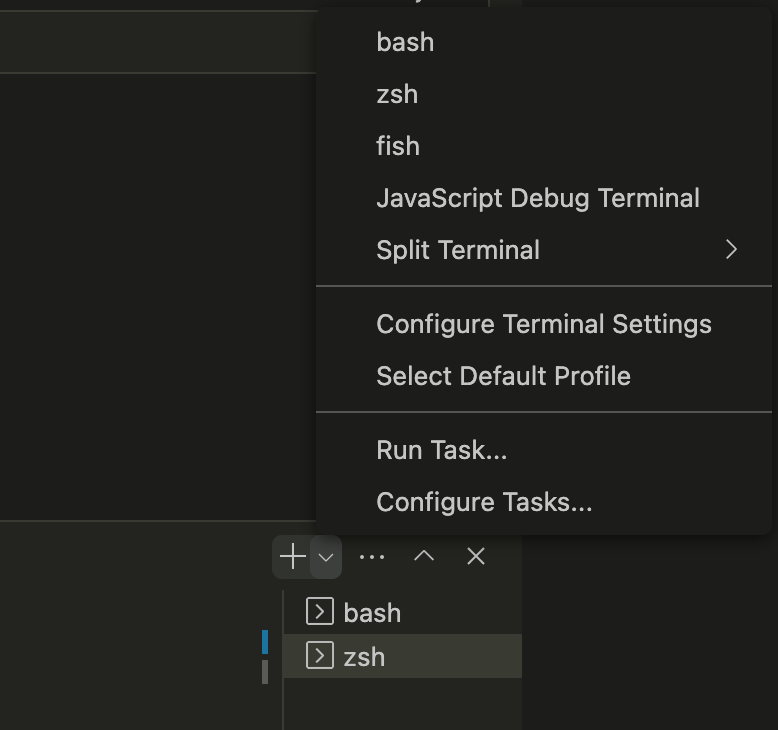

4. Execute `conda env update --file environment.yml --prune`


# installing jax

https://github.com/google/jax#installation 

In [3]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.2 MB/s eta 0:00:00:00:01
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1


In [4]:
!pip install --upgrade "jax[cpu]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.2 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.6/72.6 MB 15.4 MB/s eta 0:00:0000:0100:01
  Created wheel for jax: filename=jax-0.4.5-py3-none-any.whl size=1424421 sha256=70d0ad8a8085c13c1c4d9d683e64517ee5fad3a5caca65e5b349c07f76fe13df
  Stored in directory: /home/codespace/.cache/pip/wheels/b7/30/dd/bf6327f2ce6fa1abccdbaeb9d042431188717fe85a50410567
Successfully built jax


In [6]:
!pip install flax

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.1/210.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.2/74.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 58.0 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.5/146.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 2.9 MB/s eta 0:00:00


In [7]:
# example from chatgpt prompt: "Great! Thanks so much ChatGPT. However, I just want expert learners to do something right away! Can you please share a python code example for embeddings that is as easy as possible to understand in a short period of time! We have 35 minutes left!"

# Import necessary libraries
import jax
import jax.numpy as jnp
from flax.linen import Embed

# Prepare corpus
sentences = [["this", "is", "a", "sentence"], ["this", "is", "another", "sentence"]]

# Define embedding dimension
embedding_dim = 10

# Create embedding layer
embedding = Embed(num_embeddings=10000, features=embedding_dim)

# Convert corpus to indices
corpus_indices = [[vocab[word] for word in sentence] for sentence in sentences]

# Convert indices to embeddings
embeddings = jnp.array([embedding(jnp.array(sentence_indices)) for sentence_indices in corpus_indices])

# Print embeddings
print(embeddings)


NameError: name 'vocab' is not defined

In [8]:
# the above code has a bug! 'vocab' is not defined! 
# need to debug this! 
# chatgpt interlude and bug fix

# Import necessary libraries
import jax
import jax.numpy as jnp
from flax.linen import Embed

# Prepare corpus
sentences = [["this", "is", "a", "sentence"], ["this", "is", "another", "sentence"]]

# Define embedding dimension
embedding_dim = 10

# Create embedding layer
vocab_size = 10000
embedding = Embed(num_embeddings=vocab_size, features=embedding_dim)

# Create vocabulary dictionary
vocab = {word: i for i, word in enumerate(set([word for sentence in sentences for word in sentence]))}

# Convert corpus to indices
corpus_indices = [[vocab[word] for word in sentence] for sentence in sentences]

# Convert indices to embeddings
embeddings = jnp.array([embedding(jnp.array(sentence_indices)) for sentence_indices in corpus_indices])

# Print embeddings
print(embeddings)


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


AttributeError: "Embed" object has no attribute "embedding". If "embedding" is defined in '.setup()', remember these fields are only accessible from inside 'init' or 'apply'.

# current plan
* we tried debugging chatgpt's example code for letting us compute and visualize embeddings
* it didn't work! we got stuck in a horrible loop and chatgpt could not fix the bugs it introduced into its example code
* need to go back to the drawing board and find a more reliable code example for embeddings

Googled: https://www.google.com/search?q=jax+embedding+lookup
https://stackoverflow.com/questions/72817730/what-is-the-recommended-way-to-do-embeddings-in-jax 

> Indeed the typical way to do this in pure jax is with jnp.take. Given array A of embeddings of shape (num_embeddings, num_features) and categorical feature x of integers shaped (n,) then the following gives you the embedding lookup.

`jnp.take(A, x, axis=0)  # shape: (n, num_features)`

In [15]:
import jax 
import jax.numpy as jnp

# Define embedding dimension
embedding_dim = 10

# Define vocabulary size
vocab_size = 10000

# Create random embedding matrix
def random_embedding_matrix(vocab_size, embedding_dim):
    return jax.random.normal(jax.random.PRNGKey(0), (vocab_size, embedding_dim))

embedding_matrix = random_embedding_matrix(vocab_size, embedding_dim)

# Define the axis upon which embeddings are indexed on
embedding_axis_dim = 0 


In [ ]:
# export anaconda environment
conda env export > environment.yml

In [21]:
embedding_matrix

Array([[-0.56696093, -0.4455954 ,  0.52969086, ...,  0.13516608,
        -0.36605886,  0.3420544 ],
       [ 1.4281821 ,  1.6929787 , -0.8007914 , ...,  0.40895134,
        -0.21666816,  1.1395155 ],
       [-1.4574891 , -0.0910698 ,  0.39605212, ..., -0.28389454,
         0.5575326 , -0.74348086],
       ...,
       [-1.0935333 ,  1.5854592 ,  1.5891063 , ...,  0.5146517 ,
         0.9304627 , -1.4009534 ],
       [ 1.4628407 , -1.0949546 , -0.36347643, ...,  1.2220684 ,
         1.1903816 ,  0.08692306],
       [ 0.190806  ,  0.31824118,  0.19630799, ..., -1.7948778 ,
         1.4633209 ,  0.02424697]], dtype=float32)

In [22]:
one_embedding = embedding_matrix[0]
print(one_embedding, type(one_embedding))

[-0.56696093 -0.4455954   0.52969086  2.8718715   0.855046    1.0099614
 -0.88707995  0.13516608 -0.36605886  0.3420544 ] <class 'jaxlib.xla_extension.Array'>


In [23]:
one_embedding_alternative_method = jnp.take(embedding_matrix, 0, axis=embedding_axis_dim)
print(one_embedding_alternative_method, type(one_embedding_alternative_method))

[-0.56696093 -0.4455954   0.52969086  2.8718715   0.855046    1.0099614
 -0.88707995  0.13516608 -0.36605886  0.3420544 ] <class 'jaxlib.xla_extension.Array'>


In [24]:
one_embedding == one_embedding_alternative_method

Array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True], dtype=bool)

## Cognitive walkthrough: what just happened?
* do we know what `jnp.take` does?
* do we know what an embedding is? 
* do we know how to use embeddings?

## notes on learning new libraries in visual studio code
* function definitions can be looked up by hovering over with the mouse

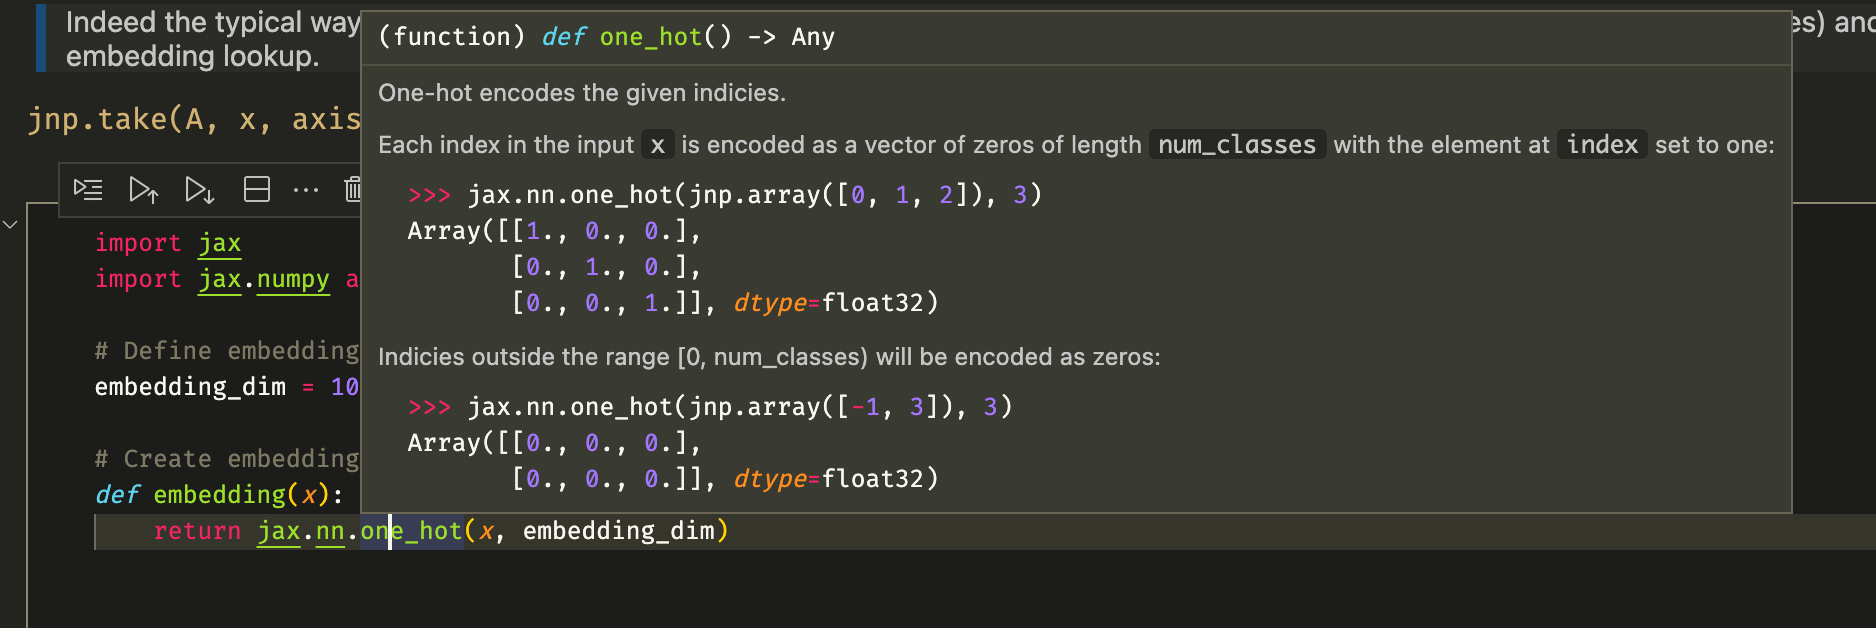

In [9]:
# interlude to fix bug!

# Import necessary libraries
import jax
import jax.numpy as jnp
from flax.linen import Embed

# Prepare corpus
sentences = [["this", "is", "a", "sentence"], ["this", "is", "another", "sentence"]]

# Define embedding dimension
embedding_dim = 10

# Create embedding layer
vocab_size = 10000
embedding = Embed(num_embeddings=vocab_size, features=embedding_dim)

# Create vocabulary dictionary
vocab = {word: i for i, word in enumerate(set([word for sentence in sentences for word in sentence]))}

# Convert corpus to indices
corpus_indices = [[vocab[word] for word in sentence] for sentence in sentences]

# Convert indices to embeddings
embeddings = jnp.array([embedding.apply(jnp.array(sentence_indices)) for sentence_indices in corpus_indices])

# Print embeddings
print(embeddings)


AttributeError: 'Array' object has no attribute 'items'

In [10]:
# interlude to fix bug! and help chatgpt fix its own bugs
# Import necessary libraries
import jax
import jax.numpy as jnp
from flax.linen import Embed

# Prepare corpus
sentences = [["this", "is", "a", "sentence"], ["this", "is", "another", "sentence"]]

# Define embedding dimension
embedding_dim = 10

# Create embedding layer
vocab_size = 10000
embedding = Embed(num_embeddings=vocab_size, features=embedding_dim)

# Create vocabulary dictionary
vocab = {word: i for i, word in enumerate(set([word for sentence in sentences for word in sentence]))}

# Convert corpus to indices
corpus_indices = [[vocab[word] for word in sentence] for sentence in sentences]

# Convert indices to embeddings
embeddings = jnp.array([embedding.apply(jnp.array(sentence_indices)) for sentence_indices in corpus_indices]).numpy()

# Print embeddings
print(embeddings)


AttributeError: 'Array' object has no attribute 'items'

In [1]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare corpus and embeddings (using the code from the previous example)
sentences = [["this", "is", "a", "sentence"], ["this", "is", "another", "sentence"]]
embedding_dim = 10
embedding = Embed(num_embeddings=10000, features=embedding_dim)
corpus_indices = [[vocab[word] for word in sentence] for sentence in sentences]
embeddings = jnp.array([embedding(jnp.array(sentence_indices)) for sentence_indices in corpus_indices])

# Convert embeddings to a 2D array using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embedding_2d = pca.fit_transform(embeddings.reshape(-1, embedding_dim))

# Plot embeddings
sns.scatterplot(x=embedding_2d[:,0], y=embedding_2d[:,1])
for i, txt in enumerate([' '.join(s) for s in sentences]):
    plt.annotate(txt, (embedding_2d[i,0], embedding_2d[i,1]))
plt.show()

NameError: name 'Embed' is not defined

## Saving requirements for environment.yml

`pip3 freeze > requirements.txt  # Python3`
Then add to `environment.yml`

`conda env remove -n datathinking.org`

then add it again

`conda env create -f environment.yml`

activate it:

`conda activate datathinking.org`